4
0  =  3.91649125627335
1  =  33.993426918148366
2  =  46.66192804275853
3  =  1.881035066776426
4  =  28.543841354178564
5  =  24.1296476086492
6  =  6.3163587190180905
7  =  43.815498740194755
8  =  20.49593050237813
9  =  14.805405721908155
10  =  28.26465326924045
11  =  2.9154860377037837
12  =  47.07509687357168
13  =  20.9787860834072
14  =  33.250760670968084
15  =  33.801343724948886
16  =  13.011427866998519
17  =  32.4046549859621
18  =  23.84071260272776
19  =  0.45087925712613686
20  =  1.030425913826639
21  =  36.113056017842915
22  =  8.385839724817995
23  =  18.210780486042445
24  =  22.612582871197986
25  =  18.74551787168357
26  =  45.7947271947699
27  =  13.05075405483036
28  =  11.879042287954753
29  =  34.65105647141008
30  =  44.785839085700516
31  =  18.810091984595957
32  =  31.83312489444303
33  =  47.2539898987457
34  =  1.1553018830927533
35  =  42.26273933332451
36  =  40.05627103576819
37  =  7.976493552840429
38  =  37.92591496961387
39  =  22.17083734178

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

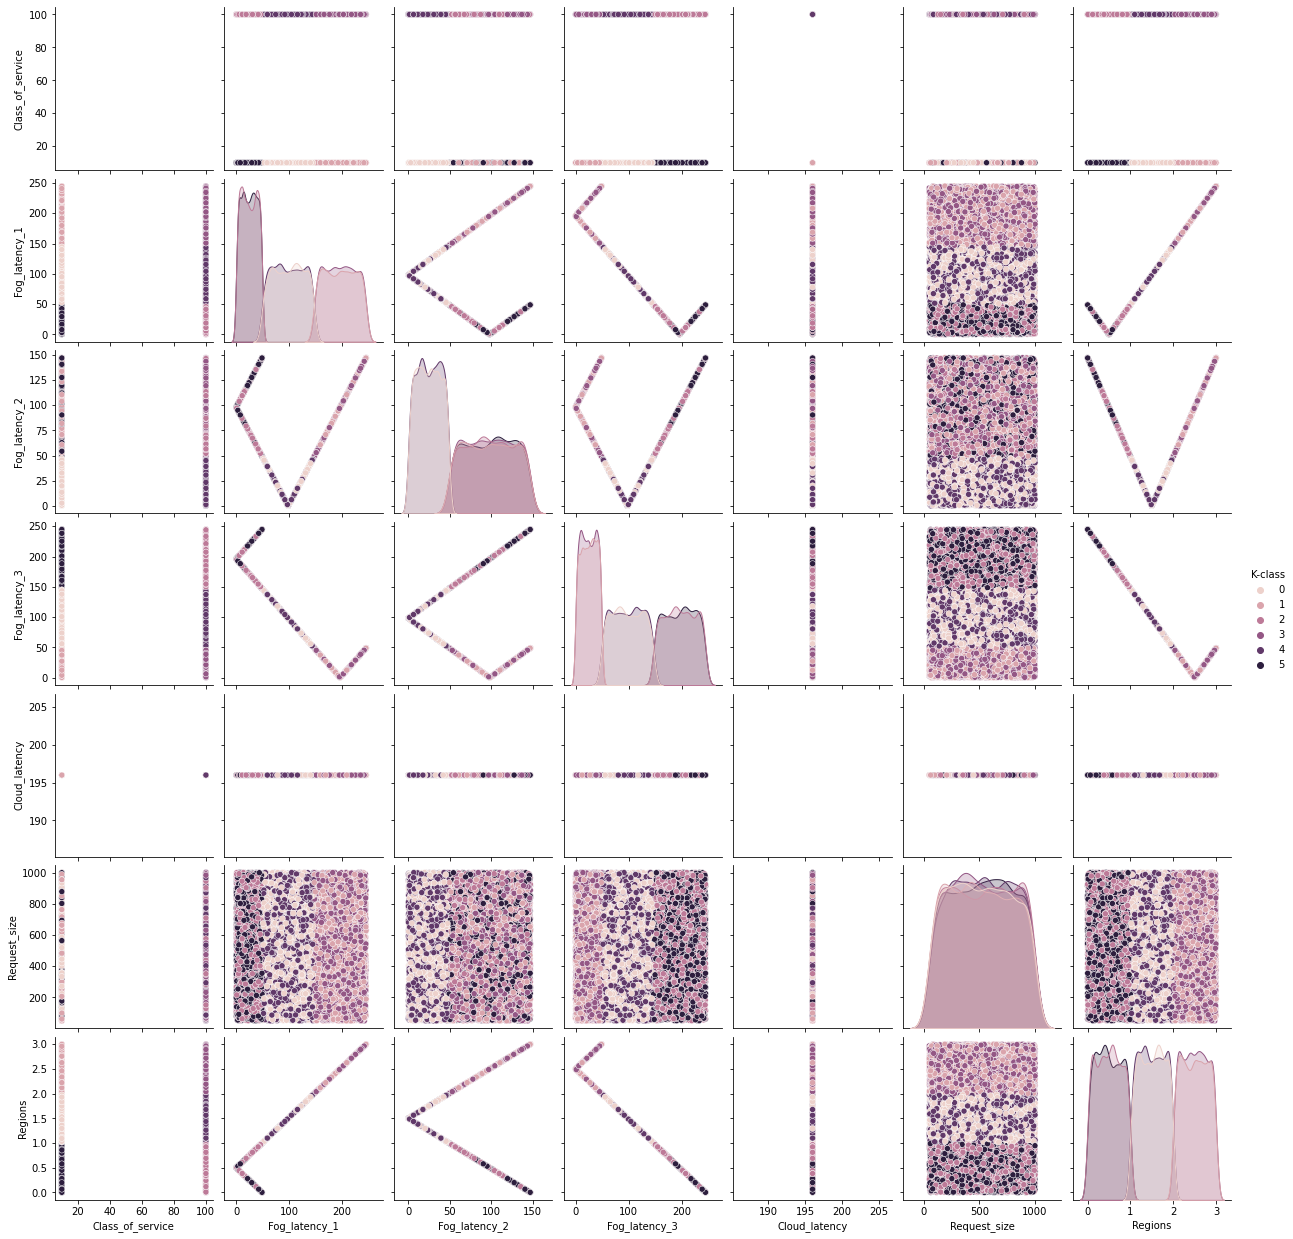

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))


sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency
    print(index, " = ", smallest_latency)

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  6
quantidade dispositivos standard =  12
Menor latencia media =  9.925798563405753
latencia média por prioridade =  140.59246523007243
Horário =  1


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  6
quantidade dispositivos prioritarios =  16
quantidade dispositivos standard =  20
Menor latencia media =  8.219164876659658
latencia média por prioridade =  117.10805376554852
Horário =  2


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  28
quantidade dispositivos standard =  42
Menor latencia media =  9.548933081709041
latencia média por prioridade =  127.14893308170906
Horário =  3


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  63
Menor latencia media =  12.40712034781733
latencia média por prioridade =  109.63546680451029
Horário =  4


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  115
quantidade dispositivos standard =  101
Menor latencia media =  11.888630873119636
latencia média por prioridade =  103.53677902126778
Horário =  5


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  190
quantidade dispositivos standard =  155
Menor latencia media =  13.294912387181279
latencia média por prioridade =  101.35288340167406
Horário =  6


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  247
quantidade dispositivos standard =  271
Menor latencia media =  11.677149028461605
latencia média por prioridade =  114.21768956900219
Horário =  7


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  401
quantidade dispositivos standard =  330
Menor latencia media =  13.260353684098762
latencia média por prioridade =  101.74188583184161
Horário =  8


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  477
quantidade dispositivos standard =  491
Menor latencia media =  12.147337066456407
latencia média por prioridade =  111.56469243835731
Horário =  9


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  610
quantidade dispositivos standard =  595
Menor latencia media =  12.809864956320315
latencia média por prioridade =  109.58994794387218
Horário =  10


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  703
quantidade dispositivos standard =  705
Menor latencia media =  12.366996680941613
latencia média por prioridade =  110.50620122639617
Horário =  11


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  761
Menor latencia media =  12.25134258953449
latencia média por prioridade =  108.66763218229464
Horário =  12


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  810
Menor latencia media =  12.17957079749887
latencia média por prioridade =  111.65325500802528
Horário =  13


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  778
quantidade dispositivos standard =  769
Menor latencia media =  12.154267034233746
latencia média por prioridade =  109.58413128762736
Horário =  14


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  738
quantidade dispositivos standard =  670
Menor latencia media =  12.84312276655845
latencia média por prioridade =  106.11016822110383
Horário =  15


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  594
quantidade dispositivos standard =  611
Menor latencia media =  12.156349342138405
latencia média por prioridade =  111.53892195624638
Horário =  16


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  485
quantidade dispositivos standard =  483
Menor latencia media =  12.402958354158928
latencia média por prioridade =  110.20047901531605
Horário =  17


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  368
quantidade dispositivos standard =  363
Menor latencia media =  12.210847880331949
latencia média por prioridade =  109.540533242849
Horário =  18


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  268
quantidade dispositivos standard =  250
Menor latencia media =  12.897624433785596
latencia média por prioridade =  107.49221902838015
Horário =  19


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  163
quantidade dispositivos standard =  182
Menor latencia media =  11.55738465171315
latencia média por prioridade =  114.9544861009885
Horário =  20


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  107
quantidade dispositivos standard =  109
Menor latencia media =  11.614381241128058
latencia média por prioridade =  110.52178864853542
Horário =  21


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  74
quantidade dispositivos standard =  53
Menor latencia media =  15.527081020019885
latencia média por prioridade =  97.3223566105711
Horário =  22


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  37
quantidade dispositivos standard =  33
Menor latencia media =  12.319431506554004
latencia média por prioridade =  104.71943150655396
Horário =  23


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  24
quantidade dispositivos standard =  12
Menor latencia media =  16.121772247994798
latencia média por prioridade =  81.45510558132813


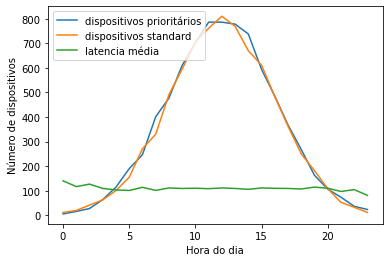

In [3]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    print("Número ótimo de clusters = ", n)

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    #kmeans.labels_
    df_by_hour[str(i)]['K-class'] = kmeans.labels_
    #devicesDf

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)
    #sb.pairplot(df_by_hour[str(i)], hue="K-class")

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.2618843389144818, 0), (0.8561956225394924, 2), (1.464727612007937, 5), (1.8730654612030249, 1), (2.2723184790253708, 3), (2.505107169482498, 4)]
Latencia media:  140.85225100309924
Horário =  1


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.2729648176394852, 5), (1.0107850673328747, 2), (1.6230193100304344, 0), (1.9106881582090312, 4), (2.5379879981450895, 3), (2.662421357454436, 1)]
Latencia media:  117.10805376554855
Horário =  2


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.44223472651534257, 5), (0.7434172552931334, 3), (1.3376289285297465, 1), (1.6864283288496043, 2), (2.3678818374183055, 4), (2.643895687184999, 0)]
Latencia media:  127.17811866260537
Horário =  3


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.5567691019397679, 3), (0.6360396573247074, 1), (1.4304238935925844, 0), (1.5865818609236084, 4), (2.476634292931495, 5), (2.569387250404356, 2)]
Latencia media:  109.96453979365496
Horário =  4


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.42903666172890986, 1), (0.5098594085339865, 3), (1.5355808436966791, 0), (1.6050622706531417, 5), (2.4757554870817904, 4), (2.602444019249825, 2)]
Latencia media:  103.53677902126782
Horário =  5


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[(0.46838023778013715, 0), (0.48885295846519816, 3), (1.5346727006758976, 5), (1.5467887518613603, 2), (2.496512599458068, 1), (2.514880017243521, 4)]
Latencia media:  101.35549377702384
Horário =  6


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0.42120443155494436, 5), (0.5252545453421545, 2), (1.499876165578757, 3), (1.5173977998717114, 1), (2.4833160746680356, 4), (2.490613325648771, 0)]
Latencia media:  114.22489458500408
Horário =  7


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0.460065047968262, 0), (0.4802460658802723, 3), (1.4000194914386632, 1), (1.4337119512745236, 2), (2.4256181225075877, 4), (2.4640804177320312, 5)]
Latencia media:  101.8312007155558
Horário =  8


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[(0.5187255218501131, 3), (0.5323663393368718, 5), (1.4648508848444177, 0), (1.4917901365360264, 1), (2.469400609108323, 4), (2.540648812797005, 2)]
Latencia media:  111.57093727007693
Horário =  9


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[(0.4748492349118092, 0), (0.49713991521986567, 4), (1.4610242323131912, 2), (1.5591436044294782, 5), (2.4948304656136235, 1), (2.49978367995866, 3)]
Latencia media:  111.3416468623777
Horário =  10


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[(0.4987781612564619, 0), (0.5301723883264682, 4), (1.5035292896080223, 2), (1.5520472478439347, 5), (2.4930489562809712, 3), (2.5431477504470665, 1)]
Latencia media:  123.04511548520465
Horário =  11


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[(0.4646455991563223, 1), (0.4651284580367203, 3), (1.4601982306688697, 5), (1.5431884761222374, 2), (2.4903137891511187, 0), (2.519562789801398, 4)]
Latencia media:  129.22326593834745
Horário =  12


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[(0.45154603565092666, 4), (0.47618437180015294, 1), (1.4417259722187517, 5), (1.4925239671364758, 0), (2.476527447191424, 3), (2.4861551160172026, 2)]
Latencia media:  131.75222099216003
Horário =  13


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[(0.4890836672339456, 5), (0.5096997630903589, 2), (1.498130080911127, 3), (1.5252060643637064, 0), (2.5006308222669507, 4), (2.5083565701667734, 1)]
Latencia media:  129.48114171559428
Horário =  14


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[(0.5185753615006681, 1), (0.5408833033007177, 5), (1.5463530233437213, 4), (1.5464437806926776, 2), (2.507109091682767, 3), (2.512668043067614, 0)]
Latencia media:  122.84942942095662
Horário =  15


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[(0.4841696653737628, 4), (0.5396572648580613, 1), (1.5155425083359968, 2), (1.569689448396293, 5), (2.505173239875492, 0), (2.5320746320006973, 3)]
Latencia media:  113.74640447243061
Horário =  16


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[(0.46347972701862905, 5), (0.4916066685377767, 2), (1.4329403183734895, 0), (1.4827522904400119, 4), (2.4804467625476465, 3), (2.5428257897751694, 1)]
Latencia media:  110.22183175516777
Horário =  17


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0.44640175048241604, 3), (0.5189239920264969, 0), (1.4596873877630727, 2), (1.5632122928870127, 4), (2.4632443313596526, 1), (2.5349591751799445, 5)]
Latencia media:  109.58275113442384
Horário =  18


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[(0.4862947482910913, 1), (0.5415380457692056, 3), (1.4483844972422757, 4), (1.5570908005969475, 0), (2.4982725749438286, 2), (2.4987324663592094, 5)]
Latencia media:  107.5006728486507
Horário =  19


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[(0.4215662311835382, 1), (0.49893794092325083, 4), (1.485825469993281, 3), (1.5064413915048738, 0), (2.4792436962263107, 2), (2.597575915220267, 5)]
Latencia media:  114.95918241944736
Horário =  20


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.5025074123670272, 0), (0.519485134237301, 3), (1.537145203661168, 5), (1.6023994883416006, 2), (2.4774496937749477, 1), (2.486729616619928, 4)]
Latencia media:  110.52178864853543
Horário =  21


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.33160240471809277, 2), (1.111403346321802, 0), (1.2914620916972197, 3), (1.9196968770383236, 4), (2.1427534117183695, 5), (2.6493217971697067, 1)]
Latencia media:  103.58887616780086
Horário =  22


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.36975489789248095, 5), (0.6729254280303987, 1), (1.4884601978928933, 2), (1.5304192819211544, 3), (2.47412253216698, 4), (2.558875091832819, 0)]
Latencia media:  104.71943150655399
Horário =  23


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.5462275321838983, 4), (0.7232012265076997, 1), (1.352070948510863, 3), (2.0264364736629323, 0), (2.5447383942897623, 5), (2.560937612899153, 2)]
Latencia media:  81.45510558132814


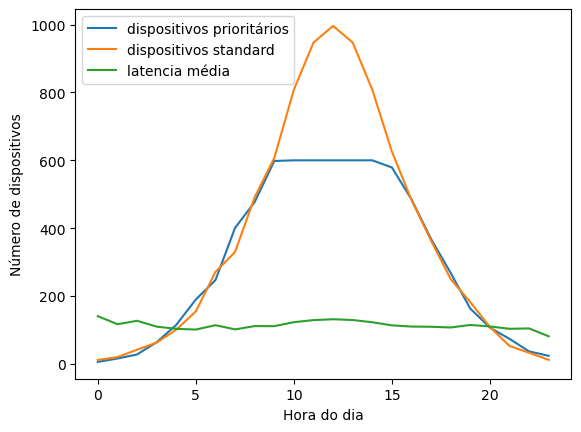

In [1]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities

list_of_devices = []
#processing_nodes = utilities.instantiate_processing_nodes(1, 3)

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
# Definição ótima da quantidade de clusters


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2


def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss


def alocation_by_priority(devices_region_1, devices_region_2, devices_region_3, processing_nodes):
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if devices_region_1[index]["Class_of_service"] == 100 and len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if devices_region_2[index]["Class_of_service"] == 100 and len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if devices_region_3[index]["Class_of_service"] == 100 and len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1
# Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))


latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some not used columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    # print("########## Region 1 ##########")
    # print(devices_region_1)
    # print("########## Region 2 ##########")
    # print(devices_region_2)
    # print("########## Region 3 ##########")
    # print(devices_region_3)

    ############
    # alocation of the devices in each region of fog node
    ############
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if devices_region_1[index]["Class_of_service"] == 100 and len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if devices_region_2[index]["Class_of_service"] == 100 and len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if devices_region_3[index]["Class_of_service"] == 100 and len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    # print("############ Connected fog 1 ############")
    # print(processing_nodes[1].connected_devices)
    # print("############ Connected cloud ############")
    # print(processing_nodes[0].connected_devices)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

In [3]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []
#processing_nodes = utilities.instantiate_processing_nodes(1, 3)

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
# Definição ótima da quantidade de clusters


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2


def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss


def alocation_by_priority(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard):
    
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if devices_region_1[index]["Class_of_service"] == 100 and len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if devices_region_2[index]["Class_of_service"] == 100 and len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if devices_region_3[index]["Class_of_service"] == 100 and len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1

    return latency_by_priority, num_priority, num_standard

def fog_first_alocation(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard):
    for index in range(len(devices_region_1)):
        # verify the priority and the availability of the fog node
        if len(processing_nodes[1].connected_devices) < processing_nodes[1].device_capacity:
            processing_nodes[1].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Fog_latency_1"]
            num_priority += 1
        else:
            # search for no_priority device connected to fog node
            for device_index in range(len(processing_nodes[1].connected_devices)):
                if processing_nodes[1].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[1].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[1].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[1].connected_devices.append(devices_region_1[index])
                    
                    break
            # if no no-priority device in found, just connect to the cloud
            processing_nodes[0].connected_devices.append(
                devices_region_1[index])
            latency_by_priority += devices_region_1[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_2)):
        if len(processing_nodes[2].connected_devices) < processing_nodes[2].device_capacity:
            processing_nodes[2].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Fog_latency_2"]
            num_priority += 1
        else:
            for device_index in range(len(processing_nodes[2].connected_devices)):
                if processing_nodes[2].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[2].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[2].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[2].connected_devices.append(devices_region_2[index])
                    
                    break
            processing_nodes[0].connected_devices.append(
                devices_region_2[index])
            latency_by_priority += devices_region_2[index]["Cloud_latency"]
            num_standard += 1

    for index in range(len(devices_region_3)):
        if len(processing_nodes[3].connected_devices) < processing_nodes[3].device_capacity:
            processing_nodes[3].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Fog_latency_3"]
            num_priority += 1
        else:
            for device_index in range(len(processing_nodes[3].connected_devices)):
                if processing_nodes[3].connected_devices[device_index]["Class_of_service"] == 10:
                    no_priority_device = processing_nodes[3].connected_devices[device_index]
                    # disconnect device from fog node
                    processing_nodes[3].connected_devices.pop(device_index)
                    # connect no-priority device on cloud node    
                    processing_nodes[0].connected_devices.append(
                        no_priority_device)
                    # connect new priority device on the fog node
                    processing_nodes[3].connected_devices.append(devices_region_3[index])
                    
                    break
            processing_nodes[0].connected_devices.append(
                devices_region_3[index])
            latency_by_priority += devices_region_3[index]["Cloud_latency"]
            num_standard += 1

    return latency_by_priority, num_priority, num_standard
# Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some not used columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    # print("########## Region 1 ##########")
    # print(devices_region_1)
    # print("########## Region 2 ##########")
    # print(devices_region_2)
    # print("########## Region 3 ##########")
    # print(devices_region_3)

    ############
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ############
    #latency_by_priority, num_priority, num_standard = alocation_by_priority(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard)', globals=globals(), number=1)
    
    # ALOCATION - FOG FIRST #
    latency_by_priority, num_priority, num_standard = fog_first_alocation(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard)
    result = timeit.timeit(stmt='fog_first_alocation(devices_region_1, devices_region_2, devices_region_3, processing_nodes, latency_by_priority, num_priority, num_standard)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    # print("############ Connected fog 1 ############")
    # print(processing_nodes[1].connected_devices)
    # print("############ Connected cloud ############")
    # print(processing_nodes[0].connected_devices)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.2618843389144818, 3), (0.8561956225394924, 0), (1.464727612007937, 1), (1.8730654612030249, 4), (2.2723184790253708, 5), (2.505107169482498, 2)]
Alocation process time:  0.0001189000000181295
Latencia media:  24.71042908946799
Horário =  1


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.5409173522912014, 4), (1.0915511394888573, 1), (1.6230193100304344, 3), (1.9106881582090312, 2), (2.5379879981450895, 0), (2.662421357454436, 5)]
Alocation process time:  0.0003089000000215947
Latencia media:  28.335715536932454
Horário =  2


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.44223472651534257, 5), (0.7434172552931334, 1), (1.3376289285297465, 0), (1.6864283288496043, 2), (2.3678818374183055, 4), (2.643895687184999, 3)]
Alocation process time:  0.0005730999999968844
Latencia media:  26.462241473725598
Horário =  3


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.5567691019397679, 1), (0.6360396573247074, 3), (1.3755243280434255, 4), (1.529835553112576, 0), (2.4289375177840493, 2), (2.5032828845302952, 5)]
Alocation process time:  0.0012689999999793145
Latencia media:  25.896153172800098
Horário =  4


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[(0.42903666172890986, 0), (0.5098594085339865, 4), (1.5355808436966791, 3), (1.6050622706531417, 2), (2.4757554870817904, 1), (2.602444019249825, 5)]
Alocation process time:  0.001973400000025549
Latencia media:  23.784409478718707
Horário =  5


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[(0.46838023778013715, 4), (0.48885295846519816, 1), (1.5346727006758976, 5), (1.5467887518613603, 3), (2.496512599458068, 2), (2.514880017243521, 0)]


IndexError: list index out of range